In this notebook we are going build a ML model to identify the fake news.

**Source:** https://www.kaggle.com/c/fake-news/data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("drive/MyDrive/Fake_news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
# Prepare X and y from df
X = df.drop("label", axis=1)
y = df["label"]

In [6]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# Let's drop nan values
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

df = df.dropna()
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
messages = df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [13]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [14]:
# Create a bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [15]:
X.shape

(18285, 5000)

In [16]:
y=messages['label']

In [17]:
# Let's split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [19]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [20]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Create function which is going to plot confusion matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix,
                          classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  
  """
  Plots the confusion matrix and normalize is set `True` by default.
  """
  plt.imshow(confusion_matrix, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion matrix, without normalization")

  thresh = confusion_matrix.max() / 2.
  for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, confusion_matrix[i, j],
             horizontalalignment='center',
             color="white" if confusion_matrix[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### MultinomialNB Algorithum

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [23]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.893
Confusion matrix, without normalization


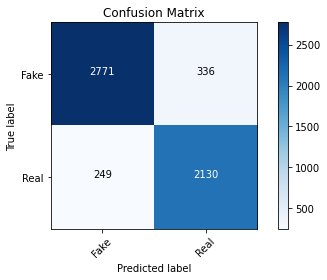

In [26]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=["Fake", "Real"])

In [28]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8933649289099526

In [29]:
y_train.shape

(12799,)

### Passive Aggressive Classifier Algorithm

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

Accuracy: 0.912
Confusion matrix, without normalization


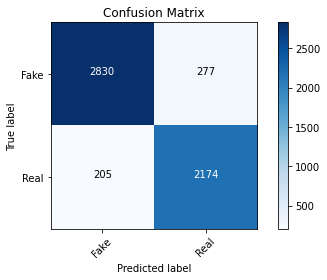

In [35]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["Fake", "Real"])

### Multinominal Calssifier with Hyperparameter

In [36]:
classifier=MultinomialNB(alpha=0.3)

In [37]:
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train, y_train)
  y_pred=sub_classifier.predict(X_test)
  score=metrics.accuracy_score(y_test, y_pred)
  if score > previous_score:
    classifier=sub_classifier
  print("Alpha:{}, Score:{}".format(alpha,score))
  

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha:0.0, Score:0.8880787458986511
Alpha:0.1, Score:0.8953700328107911
Alpha:0.2, Score:0.8955523149835946
Alpha:0.30000000000000004, Score:0.8957345971563981
Alpha:0.4, Score:0.8957345971563981
Alpha:0.5, Score:0.8955523149835946
Alpha:0.6000000000000001, Score:0.8946409041195771
Alpha:0.7000000000000001, Score:0.8940940576011666
Alpha:0.8, Score:0.8940940576011666
Alpha:0.9, Score:0.8942763397739701


In [38]:
# Get the feature names
feature_names = cv.get_feature_names()

In [39]:
classifier.coef_[0]

array([ -8.96024796,  -8.66833755,  -9.1459651 , ..., -10.84056082,
        -8.8036789 ,  -9.37422375])

In [41]:
# Most real 
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.964525569501216, 'trump'),
 (-4.275452360326687, 'hillari'),
 (-4.3671846628834805, 'clinton'),
 (-4.8383212033168705, 'elect'),
 (-5.214139470094079, 'new'),
 (-5.22217486889384, 'comment'),
 (-5.276040416270118, 'video'),
 (-5.355763890102156, 'war'),
 (-5.369691691846625, 'hillari clinton'),
 (-5.398143113071018, 'us'),
 (-5.417570630354575, 'fbi'),
 (-5.46271370142147, 'email'),
 (-5.467857745686379, 'vote'),
 (-5.559615706769245, 'obama'),
 (-5.58248691524574, 'world'),
 (-5.7319253682450215, 'donald'),
 (-5.752278852406245, 'donald trump'),
 (-5.815949575640581, 'russia'),
 (-5.830666544721275, 'presid'),
 (-5.853156248211716, 'america')]

In [42]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.840560823592812, 'abroad'),
 (-10.840560823592812, 'abus new'),
 (-10.840560823592812, 'abus new york'),
 (-10.840560823592812, 'accid'),
 (-10.840560823592812, 'act new'),
 (-10.840560823592812, 'act new york'),
 (-10.840560823592812, 'adopt'),
 (-10.840560823592812, 'advic'),
 (-10.840560823592812, 'advis new'),
 (-10.840560823592812, 'advis new york'),
 (-10.840560823592812, 'age new'),
 (-10.840560823592812, 'age new york'),
 (-10.840560823592812, 'agenda breitbart'),
 (-10.840560823592812, 'aleppo new'),
 (-10.840560823592812, 'aleppo new york'),
 (-10.840560823592812, 'ali'),
 (-10.840560823592812, 'amazon'),
 (-10.840560823592812, 'america breitbart'),
 (-10.840560823592812, 'america new york'),
 (-10.840560823592812, 'american breitbart')]

### HashingVectorizer


In [60]:
hs_vectorizer=HashingVectorizer(n_features=5000, alternate_sign=False)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [61]:
X.shape

(18285, 5000)

In [62]:
X

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
# Divide teh dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Accuracy: 0.873
Confusion matrix, without normalization


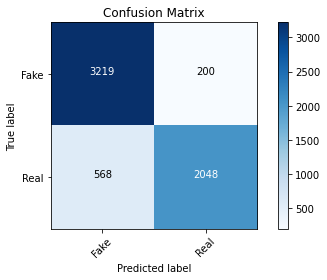

In [64]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["Fake", "Real"])